In [1]:
from IPython import display
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse.linalg
import math
import time

In [2]:
# import the cpfm_1D.py functions
import cpfm_1D_classic as cpfm
import cpfm_1D_numba as cpfm_n

You have selected the 1D CPFM simulation.
You have selected the 1D Numba CPFM simulation.


In [3]:
import cpfm_1D_DataGen as dgen

f_final = 0.1

speed_classic, speed_numba, dt_array, Na = dgen.speed_test()


Simulation completed at time 0.10330578512396695 !!!

Simulation completed at time 0.10330578512396695 !!!

Simulation completed at time 0.10010749798441378 !!!

Simulation completed at time 0.10010749798441378 !!!

Simulation completed at time 0.10003246489733504 !!!

Simulation completed at time 0.10003246489733504 !!!

Simulation completed at time 0.10001543150341637 !!!

Simulation completed at time 0.10001543150341637 !!!

Simulation completed at time 0.10000898452416981 !!!

Simulation completed at time 0.10000898452416981 !!!

Simulation completed at time 0.10000587190441274 !!!

Simulation completed at time 0.10000587190441274 !!!

Simulation completed at time 0.10000413560649529 !!!

Simulation completed at time 0.10000413560649529 !!!

Simulation completed at time 0.10000306934419646 !!!

Simulation completed at time 0.10000306934419646 !!!

Simulation completed at time 0.10000236797084938 !!!

Simulation completed at time 0.10000236797084938 !!!

Simulation completed at tim

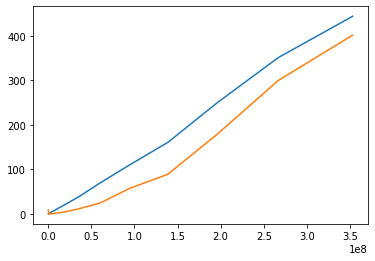

In [4]:
plt.plot(Na/dt_array, speed_classic, Na/dt_array, speed_numba)

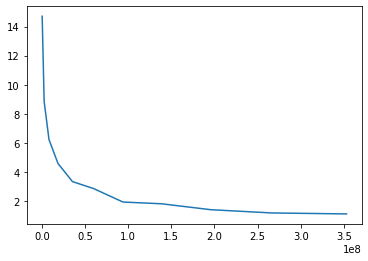

In [11]:
plt.plot(Na[1:]/dt_array[1:], speed_classic[1:]/speed_numba[1:])

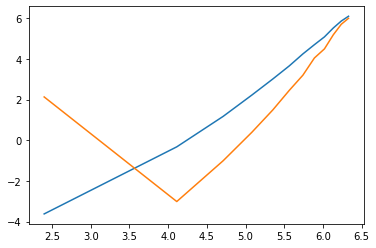

In [7]:
plt.plot(np.log(Na), np.log(speed_classic), np.log(Na), np.log(speed_numba))

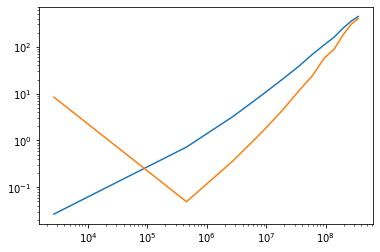

In [12]:
plt.loglog(Na/dt_array, speed_classic, Na/dt_array, speed_numba)

In [ ]:
# import the cpfm_1D.py functions
import cpfm_1D_classic as cpfm
import cpfm_1D_numba as cpfm_n

def speed_test():
    # Initialize variables for testing conditions
    Na = np.arange(11, 400, 100)
    T = 300
    k_B = 1e-2
    t_max = 0.1
    q_alpha = np.array([0.0])

    speed_classic = np.zeros(np.shape(Na)[0])
    speed_numba = np.zeros(np.shape(Na)[0])

    dt_array = np.zeros(np.shape(Na)[0])

    for i in range(np.shape(Na)[0]):

        a = 1.0/Na[i]      # calculate dx
        dt = 0.5 * a**2 # calculate dt

        dt_array[i] = dt
    
        mu_bar_alpha = np.zeros((Na[i],1)) 
        D_alpha = 1e-1 * np.ones((Na[i],1))

        # Forward Euler Classic 
        n_alpha_Update_FE = np.zeros((Na[i],1))
        n_alpha_Current_FE = np.zeros((Na[i],1))
        n_alpha_Current_FE[int((Na[i]-1)/2)] = 10.0
        n_alpha_Past_FE = np.zeros((Na[i],1))
        # Forward Euler Numba
        n_alpha_Update_n = np.zeros((Na[i],1))
        n_alpha_Current_n = np.zeros((Na[i],1))
        n_alpha_Current_n[int((Na[i]-1)/2)] = 10.0
        n_alpha_Past_n = np.zeros((Na[i],1))
    
        # Store the 1D n_alpha array for plotting
        start = time.time()
        n_CPFM_1D_forward, t_sim_finalized_FE = cpfm.simulation_Forward_1D(dt, t_max, Na[i], T, k_B, n_alpha_Update_FE, n_alpha_Current_FE, n_alpha_Past_FE, q_alpha, mu_bar_alpha, D_alpha, plotting = False)
        end = time.time()
        # record how long the run took
        speed_classic[i] = start - end

        # Store the 1D n_alpha array for plotting
        start = time.time()
        n_CPFM_1D_forward_n, t_sim_finalized_n = cpfm_n.simulation_Forward_1D(dt, t_max, Na[i], T, k_B, n_alpha_Update_n, n_alpha_Current_n, n_alpha_Past_n, q_alpha, mu_bar_alpha, D_alpha, plotting = False)
        end = time.time()
        # record how long the run took
        speed_numba[i] = start - end

    return speed_classic, speed_numba, dt_array, Na

In [ ]:
speed_test()

In [14]:
np.get_include()

'/Users/orkansezer/opt/miniconda3/lib/python3.9/site-packages/numpy/core/include'

In [ ]:
# Initialize variables for testing conditions
Na = np.arange(11, 400, 100)
T = 300
k_B = 1e-2
t_max = 0.1
q_alpha = np.array([0.0])

speed_classic = np.zeros(np.shape(Na)[0])
speed_numba = np.zeros(np.shape(Na)[0])

dt_array = np.zeros(np.shape(Na)[0])

for i in range(np.shape(Na)[0]):

    a = 1.0/Na[i]      # calculate dx
    dt = 0.5 * a**2 # calculate dt

    dt_array[i] = dt

    mu_bar_alpha = np.zeros((Na[i],1)) 
    D_alpha = 1e-1 * np.ones((Na[i],1))

    # Forward Euler Classic 
    n_alpha_Update_FE = np.zeros((Na[i],1))
    n_alpha_Current_FE = np.zeros((Na[i],1))
    n_alpha_Current_FE[int((Na[i]-1)/2)] = 10.0
    n_alpha_Past_FE = np.zeros((Na[i],1))
    # Forward Euler Numba
    n_alpha_Update_n = np.zeros((Na[i],1))
    n_alpha_Current_n = np.zeros((Na[i],1))
    n_alpha_Current_n[int((Na[i]-1)/2)] = 10.0
    n_alpha_Past_n = np.zeros((Na[i],1))
    
    # Store the 1D n_alpha array for plotting
    start = time.time()
    n_CPFM_1D_forward, t_sim_finalized_FE = cpfm.simulation_Forward_1D(dt, t_max, Na[i], T, k_B, n_alpha_Update_FE, n_alpha_Current_FE, n_alpha_Past_FE, q_alpha, mu_bar_alpha, D_alpha, plotting = False)
    end = time.time()
    # record how long the run took
    speed_classic[i] = start - end

    # Store the 1D n_alpha array for plotting
    start = time.time()
    n_CPFM_1D_forward_n, t_sim_finalized_n = cpfm_n.simulation_Forward_1D(dt, t_max, Na[i], T, k_B, n_alpha_Update_n, n_alpha_Current_n, n_alpha_Past_n, q_alpha, mu_bar_alpha, D_alpha, plotting = False)
    end = time.time()
    # record how long the run took
    speed_numba[i] = start - end



In [ ]:
speed_classic

In [ ]:
speed_numba